<a href="https://colab.research.google.com/github/aditijain2905/ML-Stock-Trading-Strategy/blob/main/ML-Stock-trading-strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

In [6]:
#load the stock data
from google.colab import files
files.upload()


Saving AAPL.csv to AAPL.csv


{'AAPL.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700\n2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200\n2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800\n2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900\n2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600\n2014-11-03,108.220001,110.300003,107.720001,109.010002,102.328766,199952900\n2014-11-10,109.019997,114.190002,108.400002,114.180000,107.646675,205166700\n2014-11-17,114.269997,117.570000,113.300003,116.470001,109.805626,233414700\n2014-11-24,116.849998,119.750000,116.620003,118.930000,112.124863,181873900\n2014-12-01,118.809998,119.250000,111.269997,115.000000,108.419746,266589700\n2014-12-08,114.099998,114.849998,109.349998,109.730003,103.451294,259868000\n2014-12-15,110.699997,113.239998,106.260002,111.779999,105.383980,328856600\n2014-12-22,112.160004,114.5199

In [7]:
#read the csv file
df = pd.read_csv('AAPL.csv')
#show the data
df


,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
1,2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2,2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
3,2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900
4,2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600
...,...,...,...,...,...,...,...
179,2018-03-05,175.210007,180.000000,174.270004,179.979996,179.979996,139852700
180,2018-03-12,180.289993,183.500000,177.619995,178.020004,178.020004,155417500
181,2018-03-19,177.320007,177.470001,164.940002,164.940002,164.940002,172670700
182,2018-03-26,168.070007,175.149994,165.190002,167.779999,167.779999,157898400


In [9]:
#set date column as index
df.index = pd.to_datetime(df['Date'])
#drop the date column
df = df.drop(['Date'] , axis = 'columns')
#show data
df



,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900
2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600
...,...,...,...,...,...,...
2018-03-05,175.210007,180.000000,174.270004,179.979996,179.979996,139852700
2018-03-12,180.289993,183.500000,177.619995,178.020004,178.020004,155417500
2018-03-19,177.320007,177.470001,164.940002,164.940002,164.940002,172670700


In [10]:
# Create the independent variables
df['High-Low'] = df['High'] - df['Low']
df['Open-Close'] = df['Open'] - df['Close']

In [14]:
#store the independent variables in a variable called 'X'
X = df[['Open-Close','High-Low', 'Close']]
#show the first 5 rows of data
X.head()


,Open-Close,High-Low,Close
Date,,,
2014-09-29,0.969993,2.650001,99.620003
2014-10-06,-0.780006,4.069999,100.730003
2014-10-13,3.660004,6.599999,97.669998
2014-10-20,-6.900001,7.269997,105.220001
2014-10-27,-3.150002,3.340004,108.000000


In [15]:
#store the target variable into a variable called 'y'
y = np.where(df.Close.shift(-1) > df.Close,1,0)
#show the data
y

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0])

In [16]:
#Get the % to split the data(90% train data set and 10% test data set)
percentage_split = 0.9
row = int(df.shape[0] * percentage_split )

#Create the training dataset
X_train = X[:row]
y_train = y[:row]

#Create the test dataset
X_test = X[row:]
y_test = y[row:]

In [17]:
X_train

,Open-Close,High-Low,Close
Date,,,
2014-09-29,0.969993,2.650001,99.620003
2014-10-06,-0.780006,4.069999,100.730003
2014-10-13,3.660004,6.599999,97.669998
2014-10-20,-6.900001,7.269997,105.220001
2014-10-27,-3.150002,3.340004,108.000000
...,...,...,...
2017-10-23,-6.160004,8.330002,163.050003
2017-10-30,-8.610001,10.539994,172.500000
2017-11-06,-2.300003,4.520004,174.669998


In [18]:
X_test

,Open-Close,High-Low,Close
Date,,,
2017-11-27,4.000000,7.919998,171.050003
2017-12-04,3.110001,6.159988,169.369995
2017-12-11,-4.770004,5.380005,173.970001
2017-12-18,-0.129990,3.949997,175.009995
2017-12-25,1.570007,2.630005,169.229996
2018-01-01,-4.839996,6.110000,175.000000
2018-01-08,-2.739990,4.360001,177.089996
2018-01-15,-0.560013,5.029999,178.460007
2018-01-22,5.790008,9.380004,171.509995


In [19]:
X

,Open-Close,High-Low,Close
Date,,,
2014-09-29,0.969993,2.650001,99.620003
2014-10-06,-0.780006,4.069999,100.730003
2014-10-13,3.660004,6.599999,97.669998
2014-10-20,-6.900001,7.269997,105.220001
2014-10-27,-3.150002,3.340004,108.000000
...,...,...,...
2018-03-05,-4.769989,5.729996,179.979996
2018-03-12,2.269989,5.880005,178.020004
2018-03-19,12.380005,12.529999,164.940002


In [20]:
# import library for the ml model Support Vector Classifier (SVC)
from sklearn.svm import SVC
#Create the model
model = SVC()
#Train the model
model.fit(X_train[['Open-Close' , 'High-Low']],y_train)

SVC()

In [21]:
# check the score of the model on the train data set
model.score(X_train[['Open-Close' , 'High-Low']],y_train)

0.6

In [22]:
# check the score of the model on the test data set
model.score(X_test[['Open-Close' , 'High-Low']],y_test)

0.42105263157894735

In [27]:
#make and show modles predictions
df["Predictions"] = model.predict(X[['Open-Close' , 'High-Low']])
#Show the predictions
df['Predictions']

Date
2014-09-29    1
2014-10-06    1
2014-10-13    1
2014-10-20    1
2014-10-27    1
             ..
2018-03-05    1
2018-03-12    1
2018-03-19    1
2018-03-26    1
2018-03-29    1
Name: Predictions, Length: 184, dtype: int64

In [33]:
#Calculate the daily returns
df['Return'] = df['Close'].pct_change(1)
#show the returns
df['Return']

Date
2014-09-29         NaN
2014-10-06    0.011142
2014-10-13   -0.030378
2014-10-20    0.077301
2014-10-27    0.026421
                ...   
2018-03-05    0.021395
2018-03-12   -0.010890
2018-03-19   -0.073475
2018-03-26    0.017218
2018-03-29    0.000000
Name: Return, Length: 184, dtype: float64

In [32]:
#Calculate the strategy returns
df['Start_Return'] = df['Predictions'].shift(1) * df['Return']
#Show the Strategy returns
df['Start_Return']


Date
2014-09-29         NaN
2014-10-06    0.011142
2014-10-13   -0.030378
2014-10-20    0.077301
2014-10-27    0.026421
                ...   
2018-03-05    0.021395
2018-03-12   -0.010890
2018-03-19   -0.073475
2018-03-26    0.017218
2018-03-29    0.000000
Name: Start_Return, Length: 184, dtype: float64

In [35]:
#Calculate the Cumulative returns
df['Cumul_Ret'] = df['Return'].cumsum()
#Calculation of the Strategy of  Cumulative returns
df['Cumul_Strategy'] = df['Start_Return'].cumsum()


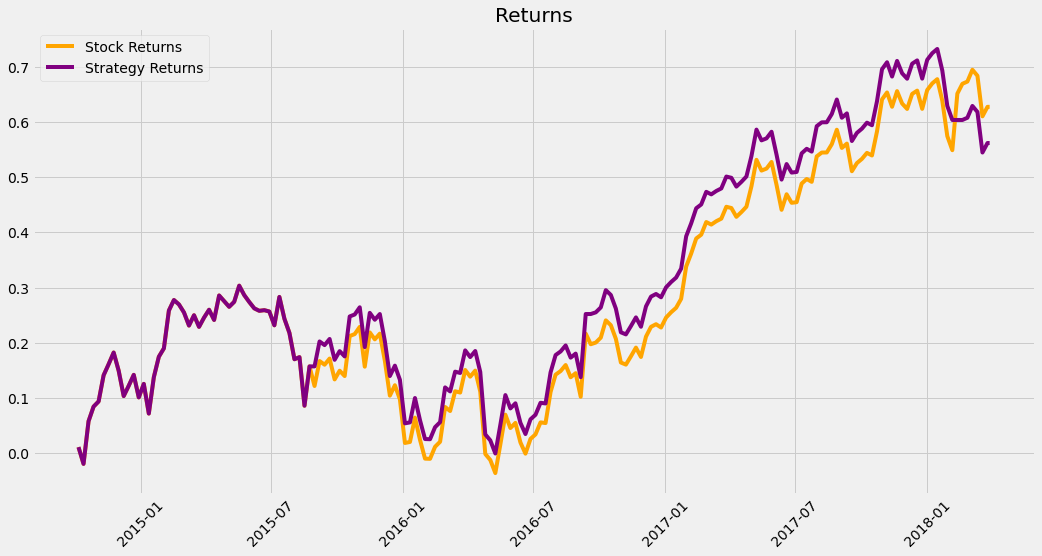

In [36]:
#Visualize and show the data
plt.figure(figsize=(16,8))
plt.title('Returns')
plt.plot(df['Cumul_Ret'] , color = 'orange' , label='Stock Returns')
plt.plot(df['Cumul_Strategy'] , color = 'purple' , label='Strategy Returns')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

In [38]:
#Print the returns
print("The stock gives a return of" , df['Cumul_Ret'][-1]*100, '%')
print("The strategy gives a return of" , df['Cumul_Strategy'][-1]*100, '%')

The stock gives a return of 62.73133729608313 %
The strategy gives a return of 56.18009110341872 %
